In [1]:
import os 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
os.chdir('C:/Users/varun/OneDrive/Desktop/python/Regression/logistic reg')

In [3]:
a = pd.read_csv('log1.csv')

In [4]:
a.head()

,Patient's year of operation,Number of positive axillary nodes detected,Survival status
0,64,1,1
1,62,3,1
2,65,0,1
3,59,2,1
4,65,4,1


In [5]:
a.columns=['Patient age','axillary node0','Survival']

In [6]:
a.head()

,Patient age,axillary node0,Survival
0,64,1,1
1,62,3,1
2,65,0,1
3,59,2,1
4,65,4,1


In [7]:
a.isnull().sum()

Patient age       0
axillary node0    0
Survival          0
dtype: int64

In [8]:
a.isna().sum()

Patient age       0
axillary node0    0
Survival          0
dtype: int64

In [9]:
a.shape

(306, 3)

In [10]:
a[a['Patient age']>65]

,Patient age,axillary node0,Survival
8,66,9,2
12,67,7,1
17,69,0,1
24,69,21,2
30,66,0,1
...,...,...,...
289,68,0,1
292,68,2,1
296,67,3,1
298,68,0,1


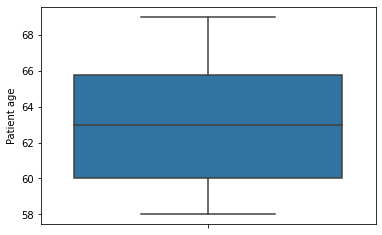

In [11]:
sns.boxplot(y='Patient age',data=a)
plt.show()

<AxesSubplot:xlabel='Survival', ylabel='count'>

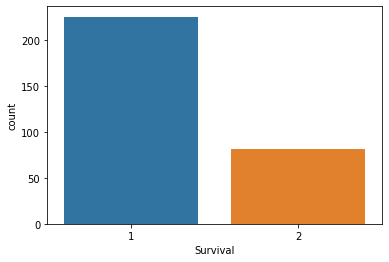

In [12]:
sns.countplot(x='Survival',data=a)

<AxesSubplot:xlabel='Patient age', ylabel='axillary node0'>

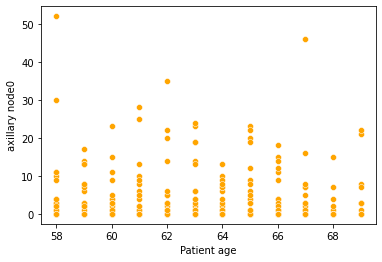

In [17]:
sns.scatterplot(y='axillary node0',x='Patient age',data=a,color='orange')

In [19]:
Q1,Q3 = a['Patient age'].quantile([0.25,0.75])
IQR = Q3-Q1
UL = Q3 + 1.5*(IQR)
LL = Q1 - 1.5*(IQR)

In [20]:
UL

74.375

In [21]:
LL

51.375

In [27]:
b = a[a['Patient age']>UL]

In [28]:
b

,Patient age,axillary node0,Survival


### No Outlier present


In [29]:
a = pd.get_dummies(a,drop_first=True)

In [30]:
a.head()

,Patient age,axillary node0,Survival
0,64,1,1
1,62,3,1
2,65,0,1
3,59,2,1
4,65,4,1


In [31]:
a.columns=['patient age','Axillary Node','Survival']

In [32]:
a.head()

,patient age,Axillary Node,Survival
0,64,1,1
1,62,3,1
2,65,0,1
3,59,2,1
4,65,4,1


In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x = a.drop('Survival',axis=1)

In [35]:
y = a['Survival']

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=33,stratify=y)

In [44]:
x_train.shape

(214, 2)

In [45]:
x_test.shape

(92, 2)

In [46]:
y_train.shape

(214,)

In [47]:
y_test.shape

(92,)

In [51]:
print(y_train.value_counts(normalize=True).round(2))

1    0.73
2    0.27
Name: Survival, dtype: float64


<AxesSubplot:xlabel='Survival', ylabel='count'>

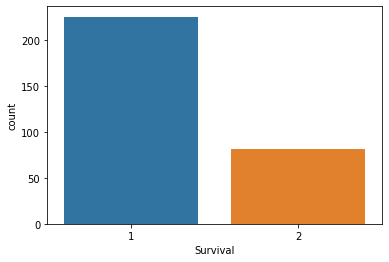

In [48]:
sns.countplot(x='Survival',data=a)

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
lr = LogisticRegression()

In [52]:
lr.fit(x_train,y_train)

LogisticRegression()

In [53]:
y_pred = lr.predict(x_test)

In [55]:
from sklearn.metrics import confusion_matrix,classification_report

In [56]:
confusion_matrix(y_test,y_pred)

array([[67,  1],
       [22,  2]], dtype=int64)

In [57]:
acc = (67+3)/(67+2+1+22)

In [58]:
acc

0.7608695652173914